In [1]:
from google.colab import drive
drive.mount('/content/drive')

from pandas.core.frame import DataFrame
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle
#from keras.utils import np_utils
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Flatten , Activation, SimpleRNN, LSTM, GRU, Dropout, TimeDistributed, Reshape, Input, Lambda, Add,BatchNormalization
from tensorflow.keras import Sequential
import numpy as np
xtrin=pd.read_csv('/content/drive/MyDrive/BoTNeTIoT_split/X_train.csv', header=None)
xtest=pd.read_csv('/content/drive/MyDrive/BoTNeTIoT_split/X_test.csv', header=None)
ytrin=pd.read_csv('/content/drive/MyDrive/BoTNeTIoT_split/y_train.csv', header=None)
ytest=pd.read_csv('/content/drive/MyDrive/BoTNeTIoT_split/y_test.csv', header=None)
xtrin=xtrin.drop([0],axis=1)
xtrin=xtrin.drop([0],axis=0)

xtest=xtest.drop([0],axis=1)
xtest=xtest.drop([0],axis=0)

ytrin=ytrin.drop([0],axis=1)
ytrin=ytrin.drop([0],axis=0)

ytest=ytest.drop([0],axis=1)
ytest=ytest.drop([0],axis=0)

X_train=xtrin
y_train=ytrin
X_test=xtest
y_test=ytest

Mounted at /content/drive


In [2]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
#from sklearn.metrics import plot_confusion_matrix # will plot the confusion matrix
import time
model_performance = pd.DataFrame(columns=['Accuracy','Recall','Precision','F1-Score','time to train','time to predict','total time'])

# Logistical Classification

In [3]:
%%time
import math, time, random, datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import missingno
import pickle
from sklearn import model_selection
from sklearn import metrics


from sklearn.linear_model import LogisticRegression
start = time.time()
model = LogisticRegression().fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

<timed exec>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.


CPU times: user 3min 35s, sys: 1min 4s, total: 4min 40s
Wall time: 3min 32s


In [4]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Logistic'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 75.06%
Recall: 75.06%
Precision: 74.92%
F1-Score: 73.57%
time to train: 211.43 s
time to predict: 0.39 s
total: 211.82 s


              precision    recall  f1-score   support

           0       0.99      0.99      0.99    154088
           1       0.79      0.63      0.70    192906
           2       0.68      0.94      0.79    154257
           3       0.00      0.00      0.00     78826
           4       0.98      0.92      0.95    237694
           5       0.91      0.98      0.94    219501
           6       0.47      1.00      0.64    173494
           7       0.72      0.58      0.64    563704
           8       0.74      0.61      0.67    157815

    accuracy                           0.75   1932285
   macro avg       0.70      0.74      0.70   1932285
weighted avg       0.75      0.75      0.74   1932285

accuracy = 0.7506309886999071
recall_sum =  0.7398672062381275
precision_sum =  0.6977236408583202
f1 score = 0.7031378098887767


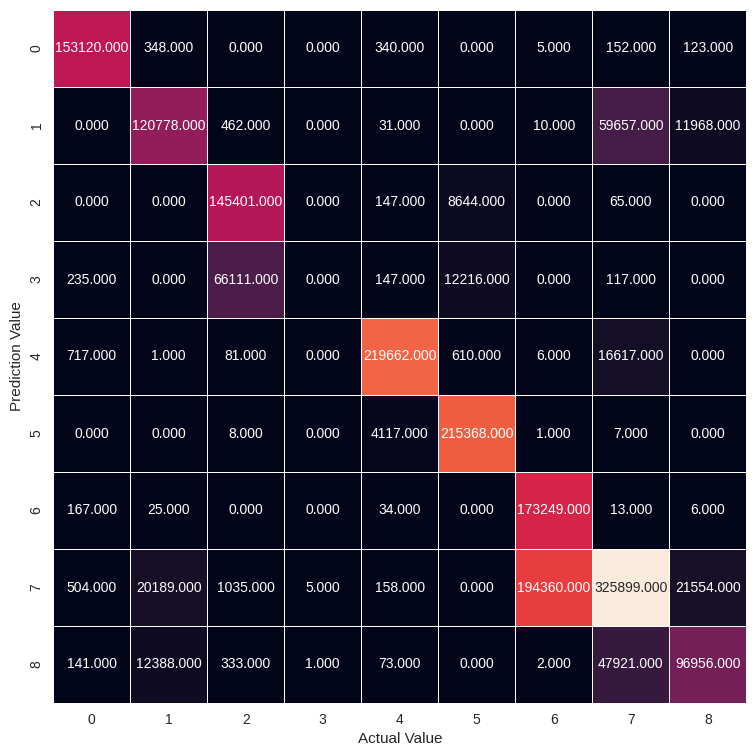

In [5]:
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix( y_test,y_pred)
#print(cm)
from sklearn.metrics import classification_report
print( classification_report(y_test,y_pred))
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True,fmt='0.3f', linewidth = 0.5 , square = True , cbar = False)
plt.ylabel("Prediction Value")
plt.xlabel("Actual Value")
plt


#Accuracy
accuracysum=0
for i in range(9):
  accuracysum=accuracysum+cm[i,i]

#precision
precision_sum=0
listprecision=[]
for i in range(9):
  fp=0
  tp=cm[i,i]
  for j in range(9):
    #print(tp)
    if (i!=j) :
      fp=fp+cm[j,i]
  precision_=tp/(tp+fp)
  listprecision.append(precision_)
  #print ("precision_",i,"=",precision_)
  precision_sum=precision_sum+precision_
precision_sum= precision_sum/9
#recall
recall_sum=0
listrecall=[]
for i in range(9):
  fn=0
  tp=cm[i,i]
  for j in range(9):
    #print(tp)
    if (i!=j) :
      fn=fn+cm[i,j]
  recall_=tp/(tp+fn)
  listrecall.append(recall_)
  #print ("recall",i,"=",recall_)
  recall_sum=recall_sum+recall_
recall_sum=recall_sum/9
#f1_score
listf=[]
sumf=0
for i in range(9):
  f=2*((listprecision[i]*listrecall[i])/(listprecision[i]+listrecall[i]+0.000001))
  listf.append(f)
  sumf=sumf+f

listf
print('accuracy =',accuracysum/1932285)
print ("recall_sum = ",recall_sum )
print ("precision_sum = ",precision_sum)
print('f1 score =',sumf/9)

naive_bayes

In [ ]:
%%time
from  sklearn.naive_bayes  import GaussianNB
start = time.time()
model = GaussianNB().fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

CPU times: user 3.55 s, sys: 1.48 s, total: 5.03 s
Wall time: 5.41 s


In [ ]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['kNN'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 56.17%
Recall: 56.17%
Precision: 49.84%
F1-Score: 48.49%
time to train: 2.78 s
time to predict: 2.63 s
total: 5.41 s


              precision    recall  f1-score   support

           0       0.99      0.47      0.63    154088
           1       0.31      0.99      0.47    192906
           2       0.80      0.68      0.73    154257
           3       0.28      0.04      0.07     78826
           4       0.90      0.95      0.92    237694
           5       0.69      1.00      0.82    219501
           6       0.47      1.00      0.64    173494
           7       0.00      0.00      0.00    563704
           8       0.99      0.61      0.76    157815

    accuracy                           0.56   1932285
   macro avg       0.60      0.64      0.56   1932285
weighted avg       0.50      0.56      0.48   1932285

accuracy = 0.5617344232346677
recall_sum =  0.6370508865244306
precision_sum =  0.6038862495045932
f1 score = 0.5610482192975703


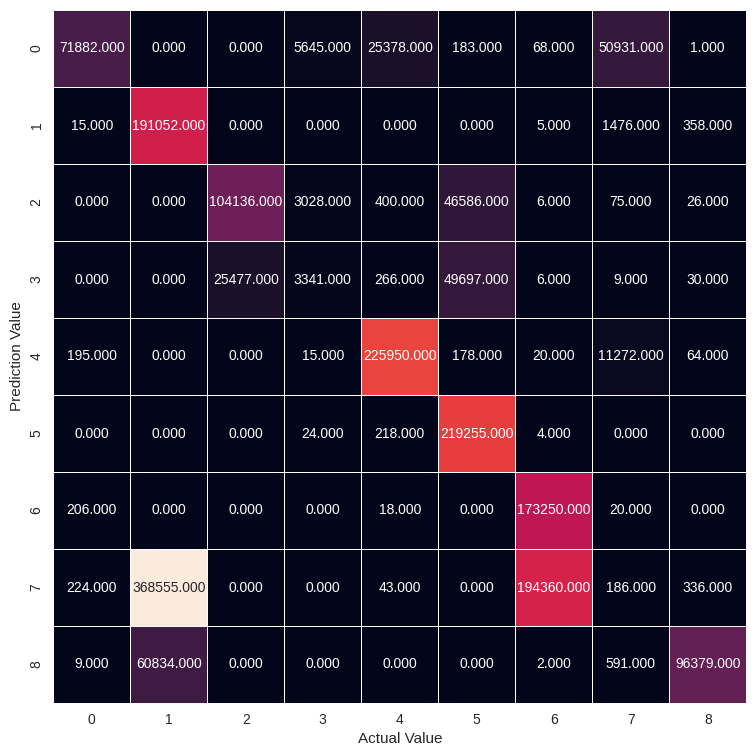

In [ ]:
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix( y_test,y_pred)
#print(cm)
from sklearn.metrics import classification_report
print( classification_report(y_test,y_pred))
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True,fmt='0.3f', linewidth = 0.5 , square = True , cbar = False)
plt.ylabel("Prediction Value")
plt.xlabel("Actual Value")
plt


#Accuracy
accuracysum=0
for i in range(9):
  accuracysum=accuracysum+cm[i,i]

#precision
precision_sum=0
listprecision=[]
for i in range(9):
  fp=0
  tp=cm[i,i]
  for j in range(9):
    #print(tp)
    if (i!=j) :
      fp=fp+cm[j,i]
  precision_=tp/(tp+fp)
  listprecision.append(precision_)
  #print ("precision_",i,"=",precision_)
  precision_sum=precision_sum+precision_
precision_sum= precision_sum/9
#recall
recall_sum=0
listrecall=[]
for i in range(9):
  fn=0
  tp=cm[i,i]
  for j in range(9):
    #print(tp)
    if (i!=j) :
      fn=fn+cm[i,j]
  recall_=tp/(tp+fn)
  listrecall.append(recall_)
  #print ("recall",i,"=",recall_)
  recall_sum=recall_sum+recall_
recall_sum=recall_sum/9
#f1_score
listf=[]
sumf=0
for i in range(9):
  f=2*((listprecision[i]*listrecall[i])/(listprecision[i]+listrecall[i]+0.000001))
  listf.append(f)
  sumf=sumf+f

listf
print('accuracy =',accuracysum/1932285)
print ("recall_sum = ",recall_sum )
print ("precision_sum = ",precision_sum)
print('f1 score =',sumf/9)

Decision Tree

In [ ]:
%%time
from sklearn.tree import DecisionTreeClassifier
start = time.time()
model = DecisionTreeClassifier().fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

CPU times: user 1min 6s, sys: 266 ms, total: 1min 7s
Wall time: 1min 7s


In [ ]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Decision Tree'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 91.02%
Recall: 91.02%
Precision: 92.71%
F1-Score: 87.15%
time to train: 67.03 s
time to predict: 0.29 s
total: 67.32 s


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    154088
           1       1.00      1.00      1.00    192906
           2       1.00      1.00      1.00    154257
           3       1.00      1.00      1.00     78826
           4       1.00      1.00      1.00    237694
           5       1.00      1.00      1.00    219501
           6       0.95      0.00      0.00    173494
           7       0.76      1.00      0.87    563704
           8       1.00      1.00      1.00    157815

    accuracy                           0.91   1932285
   macro avg       0.97      0.89      0.87   1932285
weighted avg       0.93      0.91      0.87   1932285

accuracy = 0.910246159339849
recall_sum =  0.8888858747244258
precision_sum =  0.9684497304336713
f1 score = 0.8742381757501501


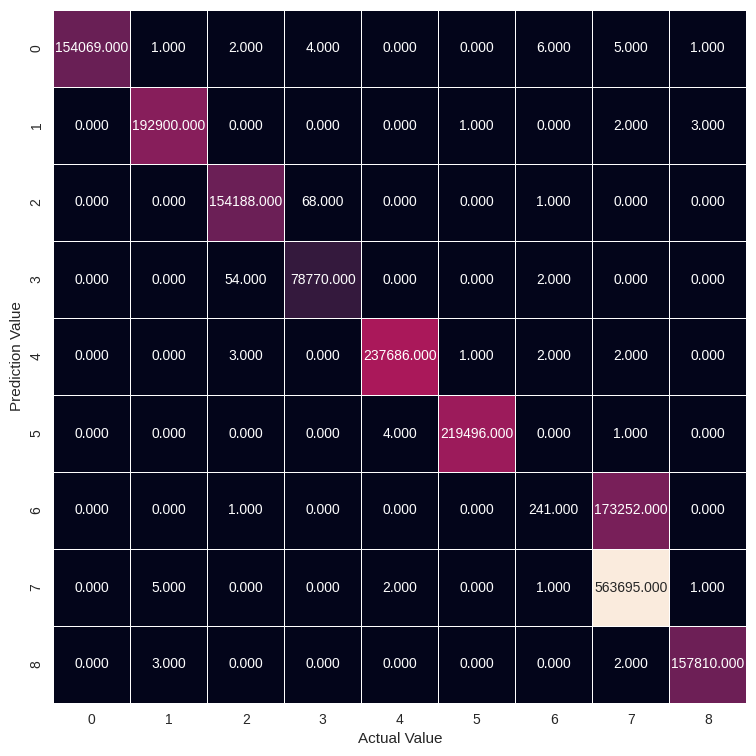

In [ ]:
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix( y_test,y_pred)
#print(cm)
from sklearn.metrics import classification_report
print( classification_report(y_test,y_pred))
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True,fmt='0.3f', linewidth = 0.5 , square = True , cbar = False)
plt.ylabel("Prediction Value")
plt.xlabel("Actual Value")
plt


#Accuracy
accuracysum=0
for i in range(9):
  accuracysum=accuracysum+cm[i,i]

#precision
precision_sum=0
listprecision=[]
for i in range(9):
  fp=0
  tp=cm[i,i]
  for j in range(9):
    #print(tp)
    if (i!=j) :
      fp=fp+cm[j,i]
  precision_=tp/(tp+fp)
  listprecision.append(precision_)
  #print ("precision_",i,"=",precision_)
  precision_sum=precision_sum+precision_
precision_sum= precision_sum/9
#recall
recall_sum=0
listrecall=[]
for i in range(9):
  fn=0
  tp=cm[i,i]
  for j in range(9):
    #print(tp)
    if (i!=j) :
      fn=fn+cm[i,j]
  recall_=tp/(tp+fn)
  listrecall.append(recall_)
  #print ("recall",i,"=",recall_)
  recall_sum=recall_sum+recall_
recall_sum=recall_sum/9
#f1_score
listf=[]
sumf=0
for i in range(9):
  f=2*((listprecision[i]*listrecall[i])/(listprecision[i]+listrecall[i]+0.000001))
  listf.append(f)
  sumf=sumf+f

listf
print('accuracy =',accuracysum/1932285)
print ("recall_sum = ",recall_sum )
print ("precision_sum = ",precision_sum)
print('f1 score =',sumf/9)

Extra Trees

In [ ]:
%%time
from sklearn.ensemble import ExtraTreesClassifier
start = time.time()
model = ExtraTreesClassifier(random_state=0,n_jobs=-1).fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

CPU times: user 13min 58s, sys: 16 s, total: 14min 14s
Wall time: 8min 18s


In [ ]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Extra Trees'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 91.03%
Recall: 91.03%
Precision: 93.07%
F1-Score: 87.16%
time to train: 471.27 s
time to predict: 27.73 s
total: 498.99 s


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    154088
           1       1.00      1.00      1.00    192906
           2       1.00      1.00      1.00    154257
           3       1.00      1.00      1.00     78826
           4       1.00      1.00      1.00    237694
           5       1.00      1.00      1.00    219501
           6       0.99      0.00      0.00    173494
           7       0.76      1.00      0.87    563704
           8       1.00      1.00      1.00    157815

    accuracy                           0.91   1932285
   macro avg       0.97      0.89      0.87   1932285
weighted avg       0.93      0.91      0.87   1932285

accuracy = 0.9103279278160312
recall_sum =  0.8890305744629458
precision_sum =  0.9729511155597648
f1 score = 0.8743825491545532


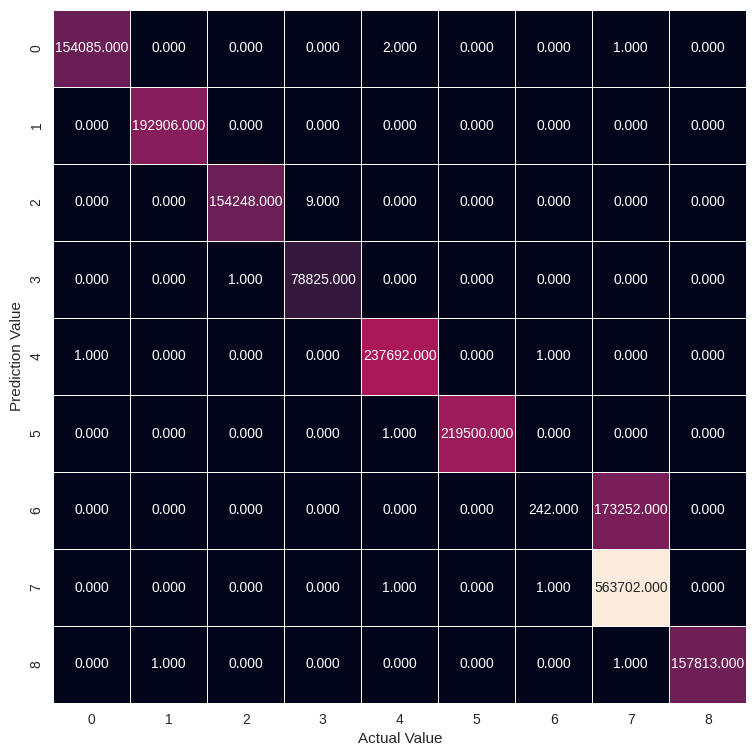

In [ ]:
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix( y_test,y_pred)
#print(cm)
from sklearn.metrics import classification_report
print( classification_report(y_test,y_pred))
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True,fmt='0.3f', linewidth = 0.5 , square = True , cbar = False)
plt.ylabel("Prediction Value")
plt.xlabel("Actual Value")
plt


#Accuracy
accuracysum=0
for i in range(9):
  accuracysum=accuracysum+cm[i,i]

#precision
precision_sum=0
listprecision=[]
for i in range(9):
  fp=0
  tp=cm[i,i]
  for j in range(9):
    #print(tp)
    if (i!=j) :
      fp=fp+cm[j,i]
  precision_=tp/(tp+fp)
  listprecision.append(precision_)
  #print ("precision_",i,"=",precision_)
  precision_sum=precision_sum+precision_
precision_sum= precision_sum/9
#recall
recall_sum=0
listrecall=[]
for i in range(9):
  fn=0
  tp=cm[i,i]
  for j in range(9):
    #print(tp)
    if (i!=j) :
      fn=fn+cm[i,j]
  recall_=tp/(tp+fn)
  listrecall.append(recall_)
  #print ("recall",i,"=",recall_)
  recall_sum=recall_sum+recall_
recall_sum=recall_sum/9
#f1_score
listf=[]
sumf=0
for i in range(9):
  f=2*((listprecision[i]*listrecall[i])/(listprecision[i]+listrecall[i]+0.000001))
  listf.append(f)
  sumf=sumf+f

listf
print('accuracy =',accuracysum/1932285)
print ("recall_sum = ",recall_sum )
print ("precision_sum = ",precision_sum)
print('f1 score =',sumf/9)

Random Forest

In [ ]:
%%time
from sklearn.ensemble import RandomForestClassifier
start = time.time()
model = RandomForestClassifier(n_estimators = 100,n_jobs=-1,random_state=0,bootstrap=True,).fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

CPU times: user 25min 2s, sys: 20.1 s, total: 25min 22s
Wall time: 14min 51s


In [ ]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Random Forest'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 91.00%
Recall: 91.00%
Precision: 92.96%
F1-Score: 87.13%
time to train: 870.96 s
time to predict: 20.12 s
total: 891.08 s


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    154088
           1       1.00      1.00      1.00    192906
           2       1.00      1.00      1.00    154257
           3       0.99      1.00      1.00     78826
           4       1.00      1.00      1.00    237694
           5       1.00      1.00      1.00    219501
           6       0.98      0.00      0.00    173494
           7       0.76      1.00      0.87    563704
           8       1.00      1.00      1.00    157815

    accuracy                           0.91   1932285
   macro avg       0.97      0.89      0.87   1932285
weighted avg       0.93      0.91      0.87   1932285

accuracy = 0.9099837756852638
recall_sum =  0.8885521953395745
precision_sum =  0.9711260946430992
f1 score = 0.8736762708667177


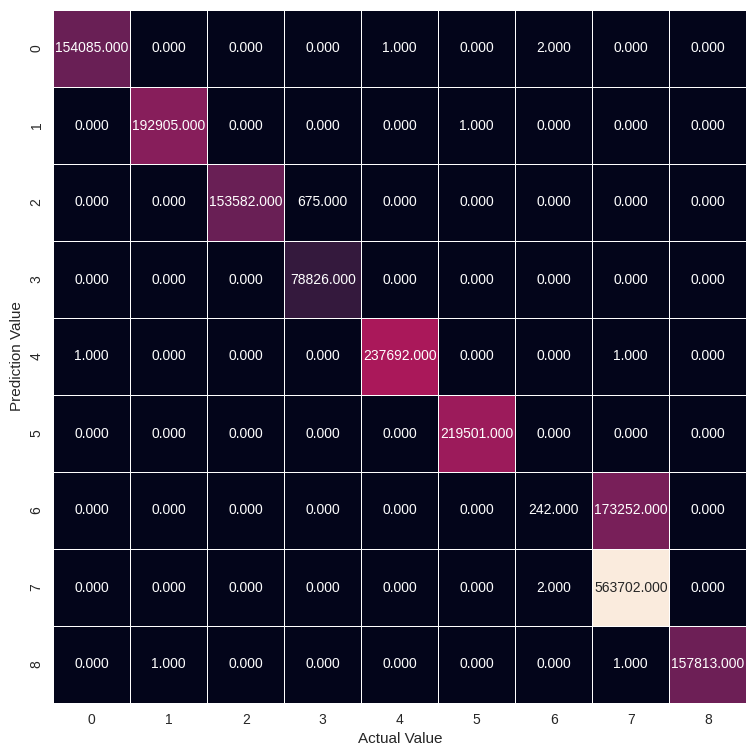

In [ ]:
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix( y_test,y_pred)
#print(cm)
from sklearn.metrics import classification_report
print( classification_report(y_test,y_pred))
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True,fmt='0.3f', linewidth = 0.5 , square = True , cbar = False)
plt.ylabel("Prediction Value")
plt.xlabel("Actual Value")
plt


#Accuracy
accuracysum=0
for i in range(9):
  accuracysum=accuracysum+cm[i,i]

#precision
precision_sum=0
listprecision=[]
for i in range(9):
  fp=0
  tp=cm[i,i]
  for j in range(9):
    #print(tp)
    if (i!=j) :
      fp=fp+cm[j,i]
  precision_=tp/(tp+fp)
  listprecision.append(precision_)
  #print ("precision_",i,"=",precision_)
  precision_sum=precision_sum+precision_
precision_sum= precision_sum/9
#recall
recall_sum=0
listrecall=[]
for i in range(9):
  fn=0
  tp=cm[i,i]
  for j in range(9):
    #print(tp)
    if (i!=j) :
      fn=fn+cm[i,j]
  recall_=tp/(tp+fn)
  listrecall.append(recall_)
  #print ("recall",i,"=",recall_)
  recall_sum=recall_sum+recall_
recall_sum=recall_sum/9
#f1_score
listf=[]
sumf=0
for i in range(9):
  f=2*((listprecision[i]*listrecall[i])/(listprecision[i]+listrecall[i]+0.000001))
  listf.append(f)
  sumf=sumf+f

listf
print('accuracy =',accuracysum/1932285)
print ("recall_sum = ",recall_sum )
print ("precision_sum = ",precision_sum)
print('f1 score =',sumf/9)

Gradient Boosting Classifier

In [ ]:
%%time
from sklearn.ensemble import GradientBoostingClassifier
start = time.time()
model = GradientBoostingClassifier().fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CPU times: user 6h 11min 28s, sys: 4min 35s, total: 6h 16min 3s
Wall time: 6h 16min 49s


In [ ]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Gradient Boosting Classifier'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 90.55%
Recall: 90.55%
Precision: 92.42%
F1-Score: 86.67%
time to train: 22574.52 s
time to predict: 35.09 s
total: 22609.61 s


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    154088
           1       1.00      1.00      1.00    192906
           2       0.96      0.98      0.97    154257
           3       0.96      0.92      0.94     78826
           4       1.00      1.00      1.00    237694
           5       1.00      1.00      1.00    219501
           6       0.97      0.00      0.00    173494
           7       0.76      1.00      0.87    563704
           8       1.00      1.00      1.00    157815

    accuracy                           0.91   1932285
   macro avg       0.96      0.88      0.86   1932285
weighted avg       0.92      0.91      0.87   1932285

accuracy = 0.9054715013572014
recall_sum =  0.8781336481217733
precision_sum =  0.9621759841644999
f1 score = 0.8644434245477787


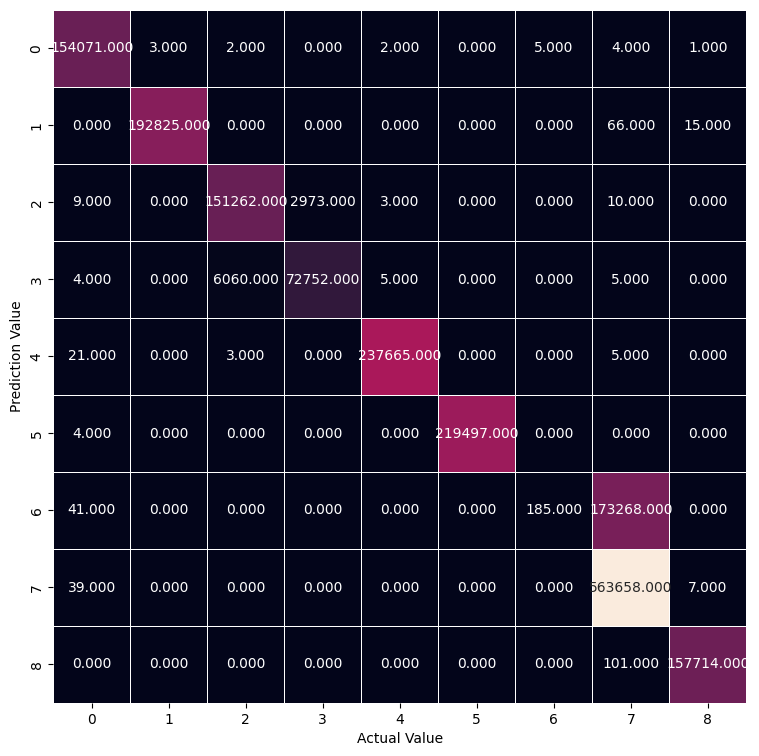

In [ ]:
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix( y_test,y_pred)
#print(cm)
from sklearn.metrics import classification_report
print( classification_report(y_test,y_pred))
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True,fmt='0.3f', linewidth = 0.5 , square = True , cbar = False)
plt.ylabel("Prediction Value")
plt.xlabel("Actual Value")
plt


#Accuracy
accuracysum=0
for i in range(9):
  accuracysum=accuracysum+cm[i,i]

#precision
precision_sum=0
listprecision=[]
for i in range(9):
  fp=0
  tp=cm[i,i]
  for j in range(9):
    #print(tp)
    if (i!=j) :
      fp=fp+cm[j,i]
  precision_=tp/(tp+fp)
  listprecision.append(precision_)
  #print ("precision_",i,"=",precision_)
  precision_sum=precision_sum+precision_
precision_sum= precision_sum/9
#recall
recall_sum=0
listrecall=[]
for i in range(9):
  fn=0
  tp=cm[i,i]
  for j in range(9):
    #print(tp)
    if (i!=j) :
      fn=fn+cm[i,j]
  recall_=tp/(tp+fn)
  listrecall.append(recall_)
  #print ("recall",i,"=",recall_)
  recall_sum=recall_sum+recall_
recall_sum=recall_sum/9
#f1_score
listf=[]
sumf=0
for i in range(9):
  f=2*((listprecision[i]*listrecall[i])/(listprecision[i]+listrecall[i]+0.000001))
  listf.append(f)
  sumf=sumf+f

listf
print('accuracy =',accuracysum/1932285)
print ("recall_sum = ",recall_sum )
print ("precision_sum = ",precision_sum)
print('f1 score =',sumf/9)